In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:,0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test) # I think it might be the author's mistake, should be sc.transform(X_test)

In [4]:
# calcualate eigenmatrix of covariance of the features of X
cov_mat = np.cov(X_train_std.T) # 13 x 13 matrix
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print('\nEigenvalues \n%s' % eigen_vals)


Eigenvalues 
[4.8923083  2.46635032 1.42809973 1.01233462 0.84906459 0.60181514
 0.52251546 0.08414846 0.33051429 0.29595018 0.16831254 0.21432212
 0.2399553 ]


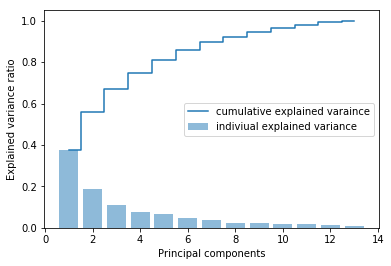

In [5]:
# plot of explained variance by each eigenvector
tot = sum(eigen_vals)
# perc of variance explained in desc order
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)] 
# cumulative perc 
cum_var_exp = np.cumsum(var_exp)

plt.bar(range(1, len(eigen_vals)+1), var_exp, alpha=0.5, align='center', label='indiviual explained variance')
plt.step(range(1, len(eigen_vals)+1), cum_var_exp, where='mid', label='cumulative explained varaince')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')

In [6]:
eigen_pairs =[(np.abs(eigen_vals[i]),eigen_vecs[:,i]) for i in range(len(eigen_vals))]
eigen_pairs.sort(reverse=True)

# take the first 2 vectors with the largest eigenvalue
# since each eigenvector is a 1-D array, need to reshape it to a matrix to become a column
# which then forms the eigenvector matrix by putting them together by horizontal stack
w = np.hstack((eigen_pairs[0][1].reshape(-1,1),
               eigen_pairs[1][1].reshape(-1,1)))
print('Matrix W:\n',w)

Matrix W:
 [[ 0.14669811  0.50417079]
 [-0.24224554  0.24216889]
 [-0.02993442  0.28698484]
 [-0.25519002 -0.06468718]
 [ 0.12079772  0.22995385]
 [ 0.38934455  0.09363991]
 [ 0.42326486  0.01088622]
 [-0.30634956  0.01870216]
 [ 0.30572219  0.03040352]
 [-0.09869191  0.54527081]
 [ 0.30032535 -0.27924322]
 [ 0.36821154 -0.174365  ]
 [ 0.29259713  0.36315461]]


In [7]:
X_train_pca = X_train_std.dot(w)
X_train_pca.shape

(124, 2)

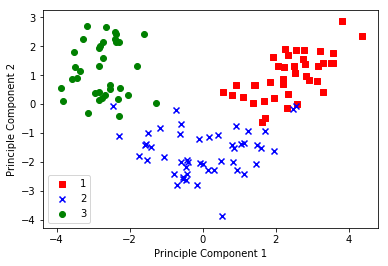

In [8]:
# visualize X transformed
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train==l, 0], 
                X_train_pca[y_train==l, 1],
                c=c, label=l, marker=m)
plt.xlabel('Principle Component 1')
plt.ylabel('Principle Component 2')
plt.legend(loc='lower left')
plt.show()

In [9]:
# PCA using scikit-learn
from matplotlib.colors import ListedColormap

# same as the one in Ch3
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                        np.arange(x2_min, x2_max, resolution))
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot all samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=[cmap(idx)], marker=markers[idx], label=cl)
    
    # highlight test samples
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='None', alpha=0.8, linewidth=1, marker='o', s=55, label='test set', edgecolors='black')

/home/hwchan91/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/hwchan91/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


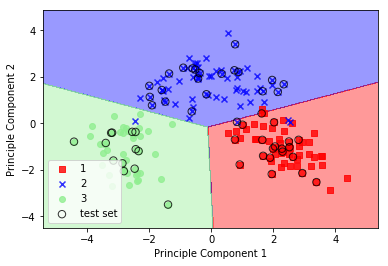

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
lr = LogisticRegression()
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
lr.fit(X_train_pca, y_train)

X_pca_combined = np.vstack((X_train_pca, X_test_pca)) 
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X_pca_combined, y_combined, classifier=lr, test_idx = range(len(X_train_pca), len(X_train_pca)+len(X_test_pca) ))
plt.xlabel('Principle Component 1')
plt.ylabel('Principle Component 2')
plt.legend(loc='lower left')
plt.show()

In [11]:
# return variance explained by not reducing any dimensions, call #explained_variance_ratio_
pca = PCA(n_components=None)
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([0.37329648, 0.18818926, 0.10896791, 0.07724389, 0.06478595,
       0.04592014, 0.03986936, 0.02521914, 0.02258181, 0.01830924,
       0.01635336, 0.01284271, 0.00642076])

In [12]:
# Linear Discriminant Analysis

np.set_printoptions(precision=4)
    
# Within-class scatter matrix
# i.e. sum of the covariance matrices of each group
d = X.shape[1]
S_W = np.zeros((d, d))
for label in np.unique(y_train):
    S_W += np.cov(X_train_std[y_train == label].T) 

# Between-class scatter matrix
mean_overall = np.mean(X_train_std, axis=0)
S_B = np.zeros((d, d))
for label in np.unique(y_train):
    n = X_train_std[y_train == label].shape[0] # I think the author made another mistake here, should be using train data
    mean_vec = np.mean(X_train_std[y_train==label], axis=0)
    diff_of_means = (mean_vec - mean_overall).reshape(-1,1)
    S_B += n * diff_of_means.dot(diff_of_means.T)

In [13]:
eigen_vals, eigen_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))
eigen_pairs =[(np.abs(eigen_vals[i]), eigen_vecs[:,i]) for i in range(len(eigen_vals))]
eigen_pairs = sorted(eigen_pairs, key=lambda k: k[0], reverse=True)
print('Eigenvalues in decreasing order:\n')
for eigen_val in eigen_pairs:
    print(eigen_val[0])

Eigenvalues in decreasing order:

452.72158124497435
156.43636121952323
1.0564670343472254e-13
3.996418537019543e-14
3.409235652909593e-14
2.842170943040401e-14
1.4793035293048285e-14
1.4793035293048285e-14
1.3494134504023504e-14
1.3494134504023504e-14
6.491059855852737e-15
6.491059855852737e-15
2.655812157040677e-15


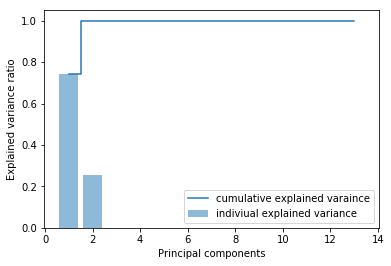

In [14]:
# plot of explained variance by each eigenvector
tot = sum(eigen_vals.real)
# perc of variance explained in desc order
var_exp = [(i / tot) for i in sorted(eigen_vals.real, reverse=True)] 
# cumulative perc 
cum_var_exp = np.cumsum(var_exp)

plt.bar(range(1, len(eigen_vals)+1), var_exp, alpha=0.5, align='center', label='indiviual explained variance')
plt.step(range(1, len(eigen_vals)+1), cum_var_exp, where='mid', label='cumulative explained varaince')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')

In [15]:
# take the first 2 vectors with the largest eigenvalue
# since each eigenvector is a 1-D array, need to reshape it to a matrix to become a column
# which then forms the eigenvector matrix by putting them together by horizontal stack
w = np.hstack((eigen_pairs[0][1].reshape(-1,1),
               eigen_pairs[1][1].reshape(-1,1)))

print(w)

X_train_lda = X_train_std.dot(w)

[[-0.0662+0.j -0.3797+0.j]
 [ 0.0386+0.j -0.2206+0.j]
 [-0.0217+0.j -0.3816+0.j]
 [ 0.184 +0.j  0.3018+0.j]
 [-0.0034+0.j  0.0141+0.j]
 [ 0.2326+0.j  0.0234+0.j]
 [-0.7747+0.j  0.1869+0.j]
 [-0.0811+0.j  0.0696+0.j]
 [ 0.0875+0.j  0.1796+0.j]
 [ 0.185 +0.j -0.284 +0.j]
 [-0.066 +0.j  0.2349+0.j]
 [-0.3805+0.j  0.073 +0.j]
 [-0.3285+0.j -0.5971+0.j]]


/home/hwchan91/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:553: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


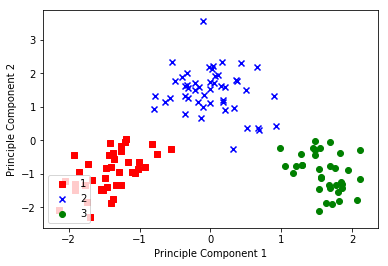

In [16]:
# visualize X transformed
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_lda[y_train==l, 0], 
                X_train_lda[y_train==l, 1],
                c=c, label=l, marker=m)
plt.xlabel('Principle Component 1')
plt.ylabel('Principle Component 2')
plt.legend(loc='lower left')
plt.show()

In [17]:
# LDA using scikit-learn
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = 2)
lr = LogisticRegression()
X_train_lda = lda.fit_transform(X_train_std, y_train)
X_test_lda = lda.transform(X_test_std)
lr.fit(X_train_lda, y_train)

/home/hwchan91/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/hwchan91/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

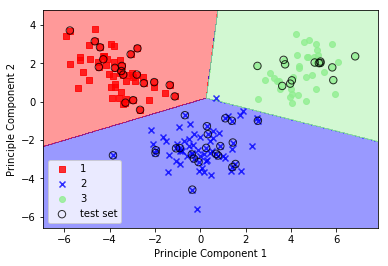

In [18]:
X_lda_combined = np.vstack((X_train_lda, X_test_lda)) 
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X_lda_combined, y_combined, classifier=lr, test_idx = range(len(X_train_lda), len(X_train_lda)+len(X_test_lda) ))
plt.xlabel('Principle Component 1')
plt.ylabel('Principle Component 2')
plt.legend(loc='lower left')
plt.show()

In [46]:
# kernel priciple component analysis
from scipy.spatial.distance import pdist, squareform
from scipy import exp
from scipy.linalg import eigh

In [47]:
test = np.array([[1,2,3],[4,5,6],[7,8,9]])
sq_dists = pdist(test, 'sqeuclidean')
print(sq_dists)
print("   # 27 = (4-1)^2 + (5-2)^2 +(6-3)^2, 108 = 3*6^2")
print("\n")
mat_sq_dists = squareform(sq_dists)
print(mat_sq_dists)
print("   # becomes a matrix of each row combined to each other row")

[ 27. 108.  27.]
   # 27 = (4-1)^2 + (5-2)^2 +(6-3)^2, 108 = 3*6^2


[[  0.  27. 108.]
 [ 27.   0.  27.]
 [108.  27.   0.]]
   # becomes a matrix of each row combined to each other row


In [135]:
# the kernel matrix substitues the the covariance matrix of the N-dimensionally projecteted matrix

# the following kernel pca uses the gaussian kernel
# gaussian kernel = exp(-square of dist/2 sigma^2) = exp(-gamma * square of dist)
def rbf_kernel_pca(X, gamma, n_components):
    # Calculate pairwise squared Euclidean distances in the MxN dimensional dataset
    # test = np.array([[1,2,3],[4,5,6],[7,8,9]])
    # pdist(test, 'sqeuclidean') # 27 = (4-1)^2 + (5-2)^2 +(6-3)^2, 108 = 3*6^2
    sq_dists = pdist(X, 'sqeuclidean')
    
    # Convert pairwise distances into a square matrix.
    mat_sq_dists = squareform(sq_dists)
    
    # Compute the symmetric kernel matrix.
    K = exp(-gamma * mat_sq_dists)
    
    # Center the kernel matrix.
    # see https://en.wikipedia.org/wiki/Centering_matrix  
    # Cn = I - 1/n; equivalent to substrating the mean of each row/col from the compoents 
    # For doubly centering(both row and col) an n-by-n matrix Cn.X.Cn = (I - 1/n).K.(I - 1/n) = K − 1(n).K − K.1(n) + 1(n).K.1(n)  
    N = K.shape[0]
    one_n = np.ones((N,N)) / N
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)
    
    # Obtaining eigenpairs from the centered kernel matrix
    # numpy.eigh returns them in sorted order
    eigvals, eigvecs = eigh(K)
    
    # Collect the top k eigenvectors (projected samples) note that this produces vectors of length = no of samples, i.e. each sample is treated as if it is a dimension itself
    X_pc = np.column_stack((eigvecs[:, -i] for i in range(1, n_components + 1)))
    
    # Collect the corresponding eigenvalues
    lambdas = [eigvals[-i] for i in range(1,n_components+1)]
    
    return X_pc, lambdas

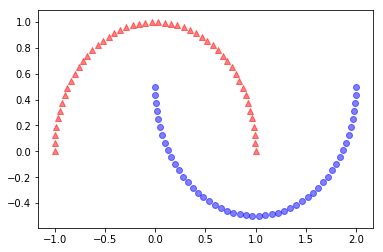

In [136]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, random_state=123)
plt.scatter(X[y==0, 0], X[y==0, 1],
color='red', marker='^', alpha=0.5)
plt.scatter(X[y==1, 0], X[y==1, 1],
color='blue', marker='o', alpha=0.5)
plt.show()

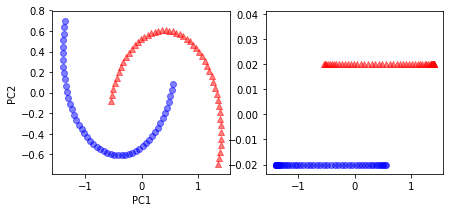

In [137]:
# unable to separate using standard PCA
from sklearn.decomposition import PCA
scikit_pca = PCA(n_components=2)
X_spca = scikit_pca.fit_transform(X)

fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(7,3))
ax[0].scatter(X_spca[y==0, 0], X_spca[y==0, 1],
color='red', marker='^', alpha=0.5)
ax[0].scatter(X_spca[y==1, 0], X_spca[y==1, 1],
color='blue', marker='o', alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')

# checking the overlap in first (reduced) component
ax[1].scatter(X_spca[y==0, 0], np.zeros((50,1))+0.02,
color='red', marker='^', alpha=0.5)
ax[1].scatter(X_spca[y==1, 0], np.zeros((50,1))-0.02,
color='blue', marker='o', alpha=0.5)

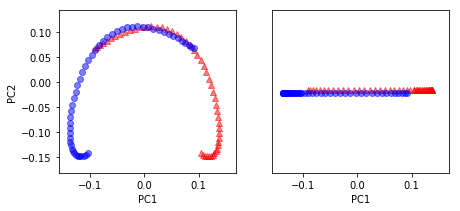

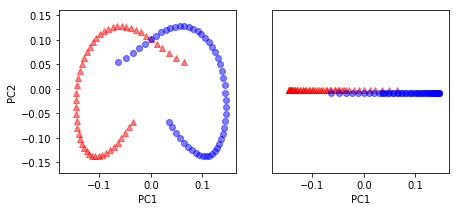

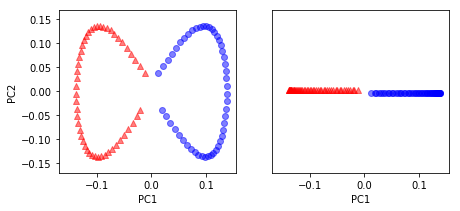

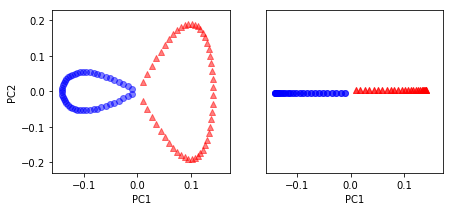

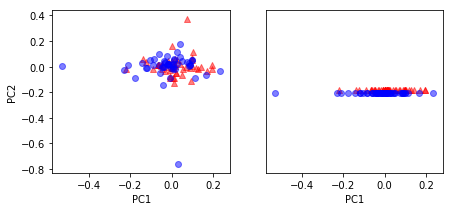

In [138]:
from matplotlib.ticker import FormatStrFormatter

def show_kpca_result():
    fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(7,3))
    ax[0].scatter(X_kpca[y==0, 0], X_kpca[y==0, 1], color='red', marker='^', alpha=0.5)
    ax[0].scatter(X_kpca[y==1, 0], X_kpca[y==1, 1], color='blue', marker='o', alpha=0.5)
    ax[0].set_xlabel('PC1')
    ax[0].set_ylabel('PC2')

    ax[1].scatter(X_kpca[y==0, 0], np.zeros((len(X_kpca[y==0]),1))+0.02,color='red', marker='^', alpha=0.5)
    ax[1].scatter(X_kpca[y==1, 0], np.zeros((len(X_kpca[y==1]),1))-0.02,color='blue', marker='o', alpha=0.5)
    ax[1].set_ylim([-1, 1])
    ax[1].set_yticks([])
    ax[1].set_xlabel('PC1')

    # ax[0].xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))
    # ax[1].xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))
    # plt.show()

# finding the right gamma
for gamma in list([0.5,5,15,150,15000]):
    X_kpca, _ = rbf_kernel_pca(X, gamma=gamma, n_components=2)
    show_kpca_result()

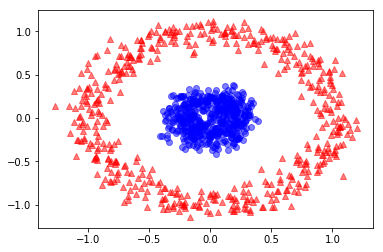

In [189]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000,random_state=123, noise=0.1, factor=0.2)
plt.scatter(X[y==0, 0], X[y==0, 1],
color='red', marker='^', alpha=0.5)
plt.scatter(X[y==1, 0], X[y==1, 1],
color='blue', marker='o', alpha=0.5)
plt.show()

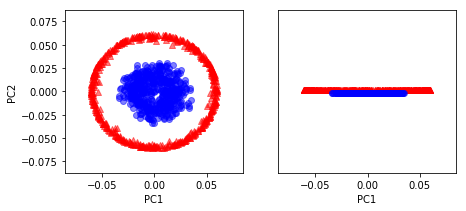

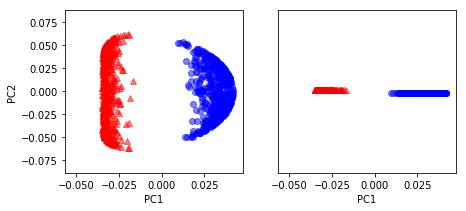

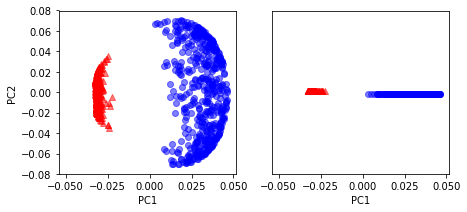

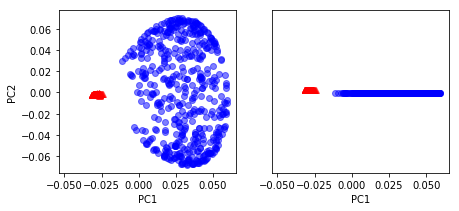

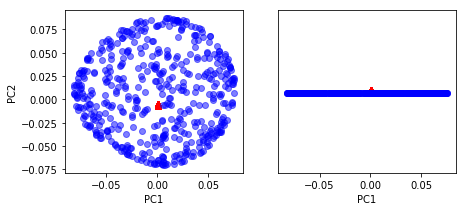

In [190]:
for gamma in list([0.5, 2.5, 5,15,50]):
    X_kpca, _ = rbf_kernel_pca(X, gamma=gamma, n_components=2)
    show_kpca_result()

In [193]:
X, y = make_moons(n_samples=100, random_state=123)

# projecting new data points
alphas, lambdas = rbf_kernel_pca(X, gamma=2.5, n_components=2)

x_new = X[30] # assume this is the new data pt
print(x_new)
print(alphas[30]) # original projection

def project_x(x_new, X, gamma, alphas, lambdas):
    pair_dist = np.array([np.sum((x_new-row)**2) for row in X]) # calculate the sum of squared diff of new pt to each of the orig data pts
    k = np.exp(-gamma * pair_dist)
    return k.dot(alphas / lambdas)

project_x(x_new, X, gamma=2.5, alphas=alphas, lambdas=lambdas) # this matches only if the points are roughly mapped to different points as well, i.e. the data is somewhat preserved

# if the circle example above is used, the projected point would be more off

[0.2225 0.9749]
[-0.1175  0.0633]


array([-0.1175,  0.077 ])

In [200]:
np.array([[1,2],[3,4]]) / [0.1, 1]

array([[10.,  2.],
       [30.,  4.]])

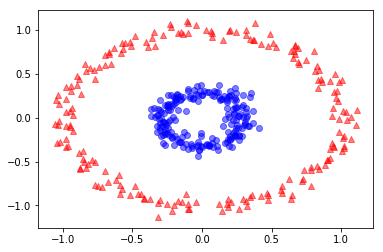

In [284]:
# kernel PCA through scikit-learn
from sklearn.decomposition import KernelPCA
X, y = make_circles(n_samples=400, factor=.3, noise=.05)
plt.scatter(X[y==0, 0], X[y==0, 1],
color='red', marker='^', alpha=0.5)
plt.scatter(X[y==1, 0], X[y==1, 1],
color='blue', marker='o', alpha=0.5)
plt.show()

scikit_kpca = KernelPCA(kernel="rbf", fit_inverse_transform=True, gamma=10) # without reducing any dimensions
scikit_kpca = KernelPCA(kernel="rbf", fit_inverse_transform=True, gamma=10, n_components=10) 
X_skernpca = scikit_kpca.fit_transform(X)

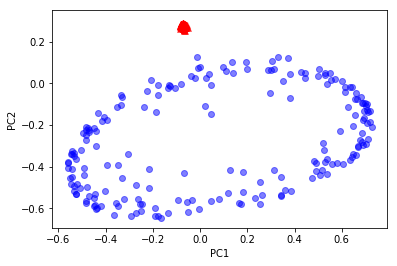

In [285]:
plt.scatter(X_skernpca[y==0, 0], X_skernpca[y==0, 1],
color='red', marker='^', alpha=0.5)
plt.scatter(X_skernpca[y==1, 0], X_skernpca[y==1, 1],
color='blue', marker='o', alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

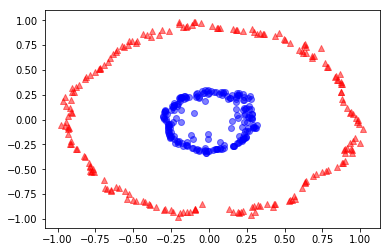

In [286]:
# inverse transform - not very useful
X = scikit_kpca.inverse_transform(X_skernpca)
plt.scatter(X[y==0, 0], X[y==0, 1],
color='red', marker='^', alpha=0.5)
plt.scatter(X[y==1, 0], X[y==1, 1],
color='blue', marker='o', alpha=0.5)
plt.show()